<a href="https://colab.research.google.com/github/pdrobny/MonReader/blob/main/P4_ocr_text_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr
!pip install pytesseract
!pip install paddleocr
!pip install paddlepaddle -f https://www.paddlepaddle.org.cn/whl/linux/cpu.html

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [2]:
from google.colab import userdata
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pytesseract
import easyocr
from paddleocr import PaddleOCR
from sentence_transformers import SentenceTransformer, util
from datasets import load_metric
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


import warnings
warnings.filterwarnings('ignore')

In [3]:
# load files from google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


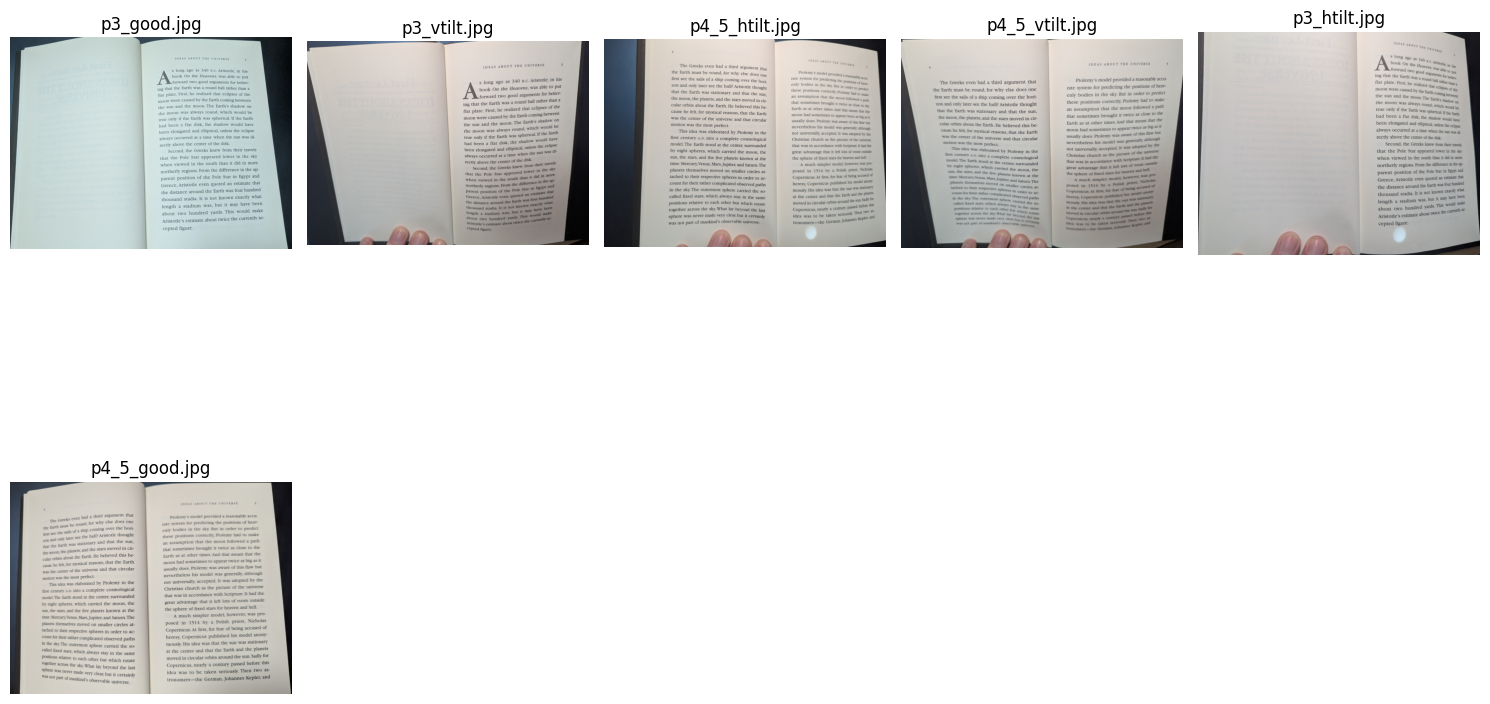

In [4]:
image_dir = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books'
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.jpg'))]

plt.figure(figsize=(15, 10))
for i, img_path in enumerate(image_files):
  if i < 10: # Limit the number of images shown
    img = plt.imread(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
  else:
    break
plt.tight_layout()
plt.show()


In [5]:
image_files

['/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_good.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_vtilt.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_htilt.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_vtilt.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_htilt.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_good.jpg']

In [6]:
p3_good = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_good.jpg'
p4_5_good = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_good.jpg'
p3_vtilt = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_vtilt.jpg'
p3_htilt = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_htilt.jpg'
p4_5_vtilt = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_vtilt.jpg'
p4_5_htilt = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_htilt.jpg'


In [7]:
p3_actual = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p3_actual.txt'
p4_5_actual = '/content/drive/MyDrive/Colab Notebooks/Apziva/MonReader/books/p4_5_actual.txt'

In [ ]:
# Load the Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

## Pytesseract

In [9]:
p3_good_tes = pytesseract.image_to_string(p3_good, lang='eng')
p3_vtilt_tes = pytesseract.image_to_string(p3_vtilt, lang='eng')
p3_htilt_tes = pytesseract.image_to_string(p3_htilt, lang='eng')
p4_5_good_tes = pytesseract.image_to_string(p4_5_good, lang='eng')
p4_5_vtilt_tes = pytesseract.image_to_string(p4_5_vtilt, lang='eng')
p4_5_htilt_tes = pytesseract.image_to_string(p4_5_htilt, lang='eng')


In [28]:
metric = load_metric("bleu")

In [29]:
# prompt: use bleu to evaluate extracted text to actual text



# Example usage with your variables
bleu_p3good = metric.compute(predictions=[p3_good_tes.split()], references=[[open(p3_actual, 'r').read().split()]])
bleu_p3vtilt = metric.compute(predictions=[p3_vtilt_tes.split()], references=[[open(p3_actual, 'r').read().split()]])
bleu_p3htilt = metric.compute(predictions=[p3_htilt_tes.split()], references=[[open(p3_actual, 'r').read().split()]])
bleu_p4_5good = metric.compute(predictions=[p4_5_good_tes.split()], references=[[open(p4_5_actual, 'r').read().split()]])
bleu_p4_5vtilt = metric.compute(predictions=[p4_5_vtilt_tes.split()], references=[[open(p4_5_actual, 'r').read().split()]])
bleu_p4_5htilt = metric.compute(predictions=[p4_5_htilt_tes.split()], references=[[open(p4_5_actual, 'r').read().split()]])

print(f"BLEU score p3_good: {bleu_p3good['bleu']}")
print(f"BLEU score p3_vtilt: {bleu_p3vtilt['bleu']}")
print(f"BLEU score p3_htilt: {bleu_p3htilt['bleu']}")
print(f"BLEU score p4_5_good: {bleu_p4_5good['bleu']}")
print(f"BLEU score p4_5_vtilt: {bleu_p4_5vtilt['bleu']}")
print(f"BLEU score p4_5_htilt: {bleu_p4_5htilt['bleu']}")

BLEU score p3_good: 0.8128135834146197
BLEU score p3_vtilt: 0.38926573727651487
BLEU score p3_htilt: 0.2622406188245381
BLEU score p4_5_good: 0.7860931849110507
BLEU score p4_5_vtilt: 0.353145573911965
BLEU score p4_5_htilt: 0.7616399922260876


In [11]:
print(p3_good_tes)

IDEAS ABOUT THE UNIVERSE

paemens

att

s long ago as 340 B.c. Aristotle, in his

book On the Heavens, was able to put

forward two good arguments for believ-
ing that the Earth was a round ball rather than a
flat plate. First, he realized that eclipses of the
| moon were caused by the Earth coming between
; the sun and the moon. The Earth's shadow on
the moon was always round, which would be
true only if the Earth was spherical. If the Earth
had been a flat disk, the shadow would have
been elongated and elliptical, unless the eclipse

always occurred at a time when the sun was di-

 

rectly above the center of the disk.

Second, the Greeks knew from their travels
that the Pole Star appeared lower in the sky
when viewed in the south than it did in more
northerly regions. From the difference in the ap-
parent position of the Pole Star in Egypt and

es

Greece, Aristotle even quoted an estimate that

the distance around the Earth was four hundred

 

thousand stadia. It is not known exa

In [12]:
print(p3_htilt_tes)

  
  
 
 
 
 
 
 
   
  
  

been elongated and elliptical, unless the eclipse
always occurred at a time when the sun was di
rectly above the center of the disk.

Second, the Greeks knew from their travels
that the Pole Star appeared lower in the sky
when viewed in the south than it did in more
northerly regions. From the difference in the ap-
parent position of the Pole Star in Egypt and
Greece, Aristotle even quoted an estimate that
the distance around the Earth was four hundred
thousand stadia. It is not knowa exactly what

cepted figure.



In [13]:
print(p4_5_good_tes)

 

The Greeks eve? had a third argument that
the garth must be sound, for why else does one
frst see the sails of a ship coming over the: 1Gis
- nl only later see the hull? Aristotle thought

that the Earth was stationa
the moon, the planets, and the stars moved in Cir-

cular orbits about the Earth. He believed this be-
cause he felt, for mystical reasons, that the Earth

ry and that the sun,

was the center of the universe and that circular
motion was the most perfect.

This idea was elaborated by Ptolemy in the
first century A.D. into a complete cosmological
model. The Earth stood at the center, surrounded
by eight spheres, which carried the moon, the
sun, the stars, and the five planets known at the
time: Mercury, Venus, Mars, Jupiter, and Saturn. The
planets themselves moved on smaller circles at-
tached to their respective spheres in order to ac-
pomar for their rather complicated observed paths
in the sky. The outermost sphere carried the so-
called fixed stars, which always sta

## easyocer

In [ ]:
reader = easyocr.Reader(['en'], gpu=False)

In [15]:
p3_good_easy = reader.readtext(p3_good)
p3_good_easytxt = ' '.join([text for (_, text, _) in p3_good_easy])
p3_vtilt_easy = reader.readtext(p3_vtilt)
p3_vtilt_easytxt = ' '.join([text for (_, text, _) in p3_vtilt_easy])
p3_htilt_easy = reader.readtext(p3_htilt)
p3_htilt_easytxt = ' '.join([text for (_, text, _) in p3_htilt_easy])
p4_5_good_easy = reader.readtext(p4_5_good)
p4_5_good_easytxt = ' '.join([text for (_, text, _) in p4_5_good_easy])
p4_5_vtilt_easy = reader.readtext(p4_5_vtilt)
p4_5_vtilt_easytxt = ' '.join([text for (_, text, _) in p4_5_vtilt_easy])
p4_5_htilt_easy = reader.readtext(p4_5_htilt)
p4_5_htilt_easytxt = ' '.join([text for (_, text, _) in p4_5_htilt_easy])

In [16]:
bleu_p3good_easy = metric.compute(predictions=[p3_good_easytxt.split()], references=[[open(p3_actual, 'r').read().split()]])
bleu_p3vtilt_easy = metric.compute(predictions=[p3_vtilt_easytxt.split()], references=[[open(p3_actual, 'r').read().split()]])
bleu_p3htilt_easy = metric.compute(predictions=[p3_htilt_easytxt.split()], references=[[open(p3_actual, 'r').read().split()]])
bleu_p4_5good_easy = metric.compute(predictions=[p4_5_good_easytxt.split()], references=[[open(p4_5_actual, 'r').read().split()]])
bleu_p4_5vtilt_easy = metric.compute(predictions=[p4_5_vtilt_easytxt.split()], references=[[open(p4_5_actual, 'r').read().split()]])
bleu_p4_5htilt_easy = metric.compute(predictions=[p4_5_htilt_easytxt.split()], references=[[open(p4_5_actual, 'r').read().split()]])

print(f"BLEU score p3_good: {bleu_p3good_easy['bleu']}")
print(f"BLEU score p3_vtilt: {bleu_p3vtilt_easy['bleu']}")
print(f"BLEU score p3_htilt: {bleu_p3htilt_easy['bleu']}")
print(f"BLEU score p4_5_good: {bleu_p4_5good_easy['bleu']}")
print(f"BLEU score p4_5_vtilt: {bleu_p4_5vtilt_easy['bleu']}")
print(f"BLEU score p4_5_htilt: {bleu_p4_5htilt_easy['bleu']}")

BLEU score p3_good: 0.7367031623248248
BLEU score p3_vtilt: 0.3519083757479421
BLEU score p3_htilt: 0.49583401537106236
BLEU score p4_5_good: 0.48716511112861555
BLEU score p4_5_vtilt: 0.3870075571824285
BLEU score p4_5_htilt: 0.5082016347267697


In [17]:
p4_5_good_easytxt

"ID EA $ A B 0 UT THE UNIV ER S E 5 4 third argumnent that Ptolemy'$ model provided a reasonably accu- The Greeks for why else does one for predicting the positions of heav- must be round, rate the ship coming over the hori- enly bodies in the But in order to predict the sails of a ficst the hull? Aristotle thought these positions correctly; Ptolemy had to make only later stationary and that the sun, an assumption that the moon followed a that the Earth was the the stars moved in cir- that sometimes brought it twice as close to the moon; the He believed this be- Earth as at other times And that meant that the cular orbits about the Earth: reasons, that the Earth moon had sometimes to appear twice as as it cause he felt; forf and that circular usually does Ptolemy was aware of this flaw but WaS the center of the universe nevertheless his model was generally; although motion was the most elaborated by Ptolemy in the not universally, accepted: It was adopted by the This idea was cosmologi

In [18]:
p4_5_htilt_easytxt

"ID EAS ABOUT The Greeks even had a third argument the Earth must be round, for why else does Ptolemy's model provided a first see the sails of a ship coming over the rate system for predicting the zon and only later see the hull? Aristotle enly bodies in sky But € positions of hear: thought order to predict that the Earth was stationary and that the these positions correctly; bad to sun; make the moon, the planets,and the stars moved in cir- an assumption that the moon followed a path cular orbits about the Earth: He believed that sometimes brought it twice aS to the this be- Earth as at other times  And that cause he felt; for mystical reasons, that the Earth meant that the moon had sometimes to appear twice as big a5 it was the center of the universe and that circular usually does. Ptolemy was aware of this flaw but motion was the most perfect: nevertheless his model was generally; although This idea was elaborated by Ptolemy in the not universally; accepted: It was adopted by the f

## paddleocr

In [ ]:
ocr = PaddleOCR(lang='en')

In [20]:
p3_good_pad = ocr.ocr(p3_good)
p3_vtilt_pad = ocr.ocr(p3_vtilt)
p3_htilt_pad = ocr.ocr(p3_htilt)
p4_5_good_pad = ocr.ocr(p4_5_good)
p4_5_vtilt_pad = ocr.ocr(p4_5_vtilt)
p4_5_htilt_pad = ocr.ocr(p4_5_htilt)

Resized image size (3072x4080) exceeds max_side_limit of 4000. Resizing to fit within limit.
Resized image size (2954x4080) exceeds max_side_limit of 4000. Resizing to fit within limit.
Resized image size (3072x4080) exceeds max_side_limit of 4000. Resizing to fit within limit.


In [22]:
p3_good_padtxt = ' '.join(p3_good_pad[0]['rec_texts'])
p3_vtilt_padtxt = ' '.join(p3_vtilt_pad[0]['rec_texts'])
p3_htilt_padtxt = ' '.join(p3_htilt_pad[0]['rec_texts'])
p4_5_good_padtxt = ' '.join(p4_5_good_pad[0]['rec_texts'])
p4_5_vtilt_padtxt = ' '.join(p4_5_vtilt_pad[0]['rec_texts'])
p4_5_htilt_padtxt = ' '.join(p4_5_htilt_pad[0]['rec_texts'])

In [23]:
bleu_p3good_pad = metric.compute(predictions=[p3_good_padtxt.split()], references=[[open(p3_actual, 'r').read().split()]])
bleu_p3vtilt_pad = metric.compute(predictions=[p3_vtilt_padtxt.split()], references=[[open(p3_actual, 'r').read().split()]])
bleu_p3htilt_pad = metric.compute(predictions=[p3_htilt_padtxt.split()], references=[[open(p3_actual, 'r').read().split()]])
bleu_p4_5good_pad = metric.compute(predictions=[p4_5_good_padtxt.split()], references=[[open(p4_5_actual, 'r').read().split()]])
bleu_p4_5vtilt_pad = metric.compute(predictions=[p4_5_vtilt_padtxt.split()], references=[[open(p4_5_actual, 'r').read().split()]])
bleu_p4_5htilt_pad = metric.compute(predictions=[p4_5_htilt_padtxt.split()], references=[[open(p4_5_actual, 'r').read().split()]])

print(f"BLEU score p3_good: {bleu_p3good_pad['bleu']}")
print(f"BLEU score p3_vtilt: {bleu_p3vtilt_pad['bleu']}")
print(f"BLEU score p3_htilt: {bleu_p3htilt_pad['bleu']}")
print(f"BLEU score p4_5_good: {bleu_p4_5good_pad['bleu']}")
print(f"BLEU score p4_5_vtilt: {bleu_p4_5vtilt_pad['bleu']}")
print(f"BLEU score p4_5_htilt: {bleu_p4_5htilt_pad['bleu']}")

BLEU score p3_good: 0.37894155943446906
BLEU score p3_vtilt: 0.8119497196702758
BLEU score p3_htilt: 0.6857128048944321
BLEU score p4_5_good: 0.6899253349630661
BLEU score p4_5_vtilt: 0.6730147908415556
BLEU score p4_5_htilt: 0.6625466279549881


In [24]:
p3_good_padtxt

"had been a flat disk, the shadow would have been elongated and ellipticalunless the eclipse always occurred at a time when the sun was di- rectly above the center of the disk. Second, the Greeks knew from their travels that the Pole Star appeared lower in the sky when viewed in the south than it did in more northerly regions.Fromthe diference in theap- parent position of the Pole Star in Egypt and Greece,Aristotle even quoted an estimate that the distance around the Earth was four hundred thousand stadia.It is not known exactly what length a stadium was, but it may have been about two hundred yards. This would make Aristotle's estimate about twice the currently ac- cepted figure."

In [25]:
p3_htilt_padtxt

"IDEAS ABOUT THE UNIVERSE 3 ILIHE IDEV2 s long ago as 340 B.c.Aristotle, in his book On tbe Heavens,was able to put NMIAEB2E forward two good arguments for believ- ing that the Earth was a round ball rather thana flat plate.First,he realized that eclipses of the moon were caused by the Earth coming between the sun and the moon. The Earth's shadow on the moon was always round, which would be true only if the Earth was spherical.If the Earth had been a flat disk,the shadow would have been elongated and elliptical,unless the eclipse always occurred at a time when the sun was di- rectly above the center of the disk. Second,the Greeks knew from their travels that the Pole Star appeared lower in the sky when viewed in the south than it did in more northerly regions.From the difference in the ap- parent position of the Pole Star in Egypt and Greece,Aristotle even quoted an estimate that the distance around the Earth was four hundred thousand stadia. It is not known exactly what length a stadi

In [26]:
p4_5_good_padtxt

"IDEAS ABOUT THE UNIVERSE 5 The Greeks even had a third argument that Ptolemy's model provided a reasonably accu- the Earth must be round, for why else does one rate system for predicting the positions of heav- first see the sails of a ship coming over the hori- enly bodies in the sky. But in order to predict zon and only later see the hull? Aristotle thought these positions correctly, Ptolemy had to make that the Earth was stationary and that the sun, an assumption that the moon followed a path the moon, the planets, and the stars moved in cir- that sometimes brought it twice as close to the cular orbits about the Earth. He believed this be- Earth as at other times. And that meant that the cause he felt, for mystical reasons,that the Earth moon had sometimes to appear twice as big as it was the center of the universe and that circular usually does.Ptolemy was aware of this flaw but motion was the most perfect. nevertheless his model was generally, although This idea was elaborated by 

In [27]:
p4_5_htilt_padtxt

"4 IDEAS ABOUT THE UNIVERSE 5 The Greeks even had a third argument that the Earth must be round,for why else dos one Ptolemy's model provided a reasonably accu- first see the sails of a ship coming over the hori- rate system for predicting the positions of heay- enly bodies in the sky. But in order to predict zon and only later see the hull? Aristotle thought these positions correctly, Ptolemy had to make that the Earth was stationary and that the sun, an assumption that the moon followed a path the moon,the planets, and the stars moved in cir- that sometimes brought it twice as close to the cular orbits about the Earth.He believed this be- Earth as at other times.And that meant that the cause he felt,for mystical reasons,that the Earth moon had sometimes to appear twice as big as it was the center of the universe and that circular usually does. Ptolemy was aware of this law but motion was the most perfect. nevertheless his model was generally, although This idea was elaborated by Ptol